# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

<h3>Reading the Heart Attack data </h3>
The following code is used to set the data paths 

In [15]:
import matplotlib.pyplot as plt
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


 The following code snippet is used to read the data from the csv files

In [16]:
heart_data = pd.read_csv(data_features_path)
heart_target=pd.read_csv(data_targets_path)
combined_heart_data = heart_data.copy()
combined_heart_data['Target']= heart_target #Combining data in order to plot histograms with the target variable

<h3>Plotting histograms to identify outliers </h3>
The following code is used to plot histograms and visualize the data and check if there are any notable ooutliers

array([[<Axes: title={'center': 'AgeAtHeartAttack'}>,
        <Axes: title={'center': 'PericardialEffusion'}>,
        <Axes: title={'center': 'FractionalShortening'}>],
       [<Axes: title={'center': 'epss'}>,
        <Axes: title={'center': 'lvdd'}>,
        <Axes: title={'center': 'WallMotionIndex'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

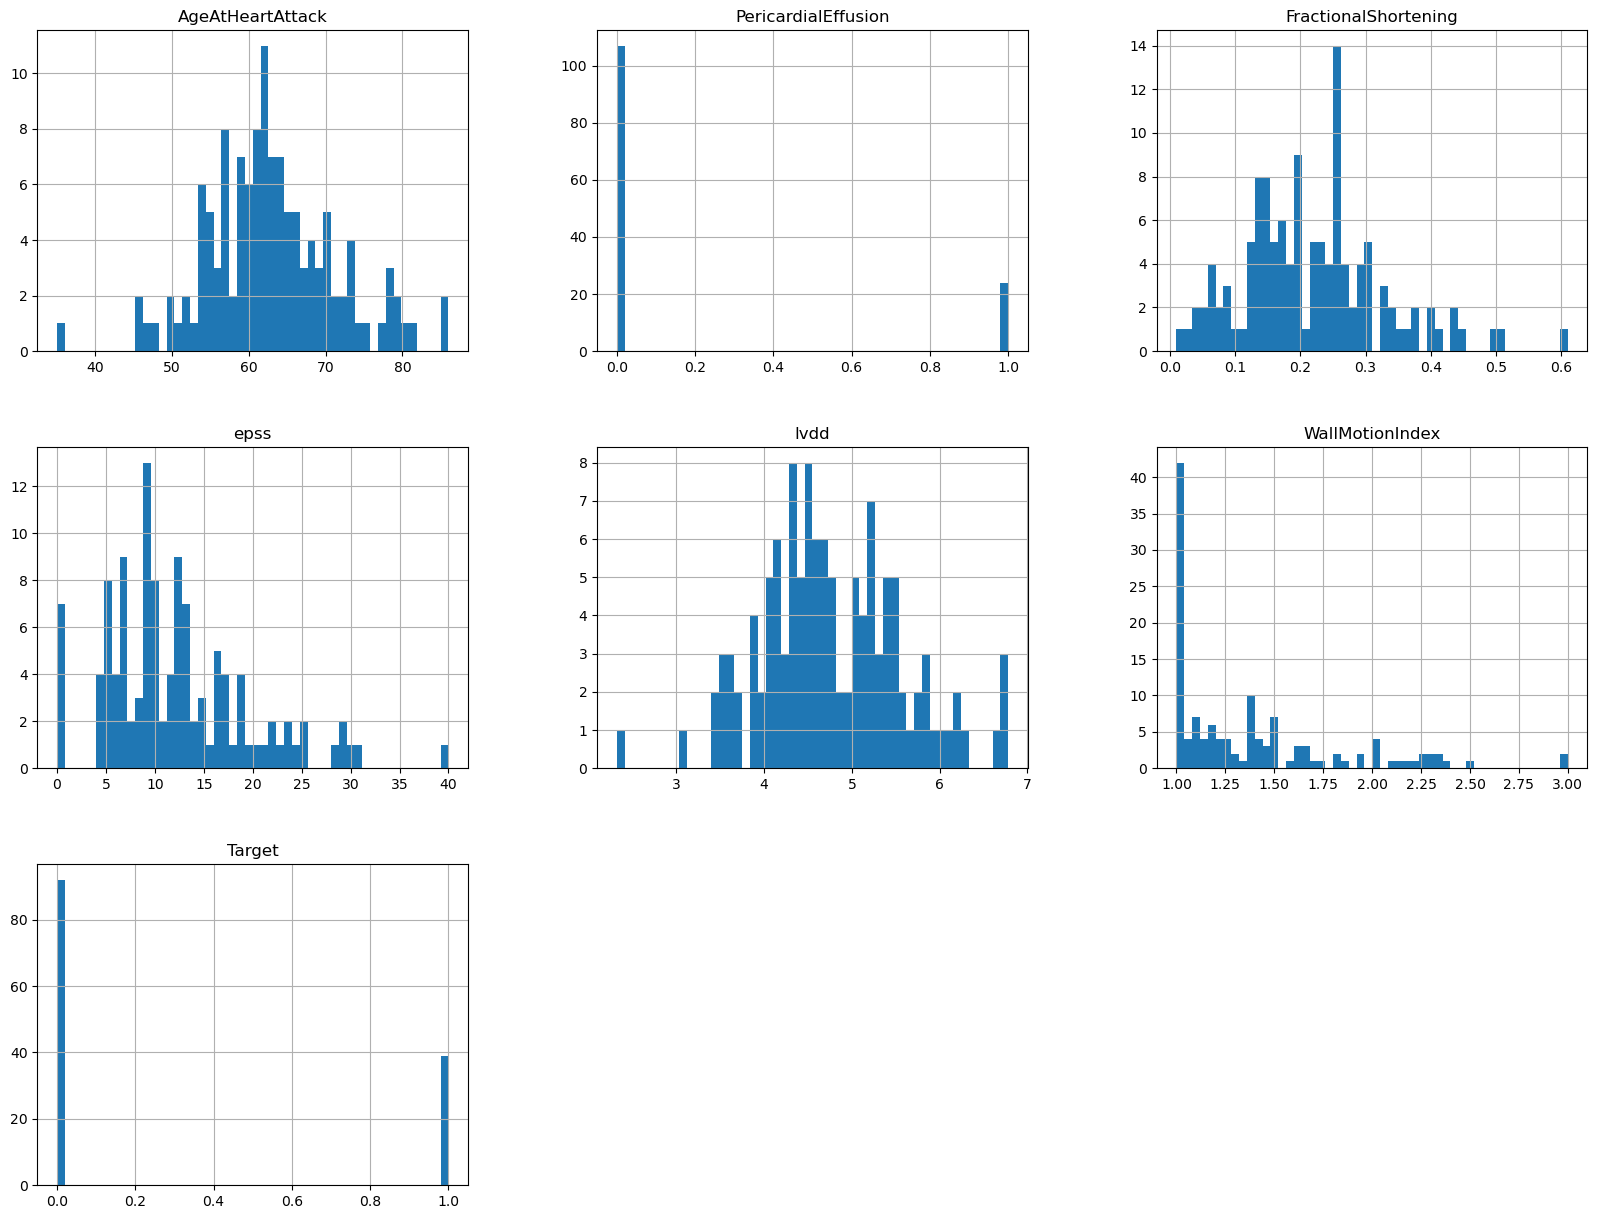

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

combined_heart_data.hist(bins=50,figsize=(20,15))



Based on the histogram plots, we can observe potential outliers in the columns AgeAtHeartAttack, FractionalShortening, epss, lvdd, and WallMotionIndex. To further investigate these outliers, we will utilize the IQR (Interquartile Range) method to precisely identify them. It is worth noting that we will not find outliers in the PericardialEffusion column since it consists of categorical data with only 0's and 1's.

<h3>Interquartile range (IQR) to Detect Outliers </h3>
The detect_outliers_iqr function uses the interquartile range (IQR) method to detect outliers in a specific column of a dataframe. It calculates the first quartile (Q1), third quartile (Q3), and the IQR. Based on these values, it identifies outliers by filtering the dataframe. The function then returns a dataframe containing the detected outliers.

In [18]:
def detect_outliers_iqr(dataframe, column):
    # Calculate the first quartile (Q1)
    Q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    
    return pd.DataFrame(outliers)


In [19]:
print("Outliers in AgeAtHeartAttack column")
outliers = pd.DataFrame(detect_outliers_iqr(combined_heart_data, 'AgeAtHeartAttack'))
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in FractionalShortening column")
outliers = detect_outliers_iqr(combined_heart_data, 'FractionalShortening')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in epss column")
outliers = detect_outliers_iqr(combined_heart_data, 'epss')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in lvdd column")
outliers = detect_outliers_iqr(combined_heart_data, 'lvdd')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in WallMotionIndex column")
outliers = detect_outliers_iqr(combined_heart_data, 'WallMotionIndex')
print(outliers)

Outliers in AgeAtHeartAttack column
    AgeAtHeartAttack  PericardialEffusion  FractionalShortening  epss  lvdd  \
21              85.0                    1                 0.180  19.0  5.46   
26              35.0                    0                 0.300   5.0  4.17   
69              86.0                    0                 0.225  12.2  5.20   

    WallMotionIndex  Target  
21             1.38       1  
26             1.00       0  
69             2.18       1  
-----------------------------------------------------------------
Outliers in FractionalShortening column
    AgeAtHeartAttack  PericardialEffusion  FractionalShortening  epss  lvdd  \
35              61.0                    0                  0.61  13.1  4.07   
38              68.0                    0                  0.51   NaN  3.88   
96              59.0                    0                  0.50   9.1  3.42   

    WallMotionIndex  Target  
35            1.625       0  
38            1.670       0  
96            

From the above code for outlier detection, we have used the function detetct_outliers_iqr() in order to check outliers for each column. However we can see that the column such as AgeAtHeartAttack outlier values can be possible in a real world scenario, a person can have a heart attack at the age of 35, 85 or 86, and these need not be any abnormal values, so we're going to ignore the 'detected' outliers.

### Handling and dealing with outliers
To handle outliers in the given dataset, we have two options: removing the outliers or replacing them with the median values. Considering the small size of the dataset (131 rows) and the significance of potential information loss, it is advisable to replace the outlier values with the median of their respective columns. This approach preserves the data integrity while mitigating the impact of outliers on the analysis.

Here's an improved version of the function that replaces outliers with the median value:

In [20]:
import pandas as pd
import numpy as np

def replace_outliers_with_median(dataframe, column):
    # Calculate the first quartile (Q1)
    Q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace the outliers with the median value
    median_value = dataframe[column].median()
    dataframe.loc[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound), column] = median_value
    
    return dataframe


In this function, we calculate the lower and upper bounds based on the interquartile range (IQR) and replace any values outside these bounds with the median value of the column. The modified DataFrame is returned, and you can use it for further analysis or display.

In [21]:
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'FractionalShortening')
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'epss')
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'lvdd')
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'WallMotionIndex')

The outliers in our data have been taken care of.

<h3>Data Split and Preprocessing</h3>
The heart data is first split into training and test sets

In [22]:
heart_train = combined_heart_data.drop("Target", axis=1)
heart_target =combined_heart_data["Target"]

from sklearn.model_selection import train_test_split

# assuming X is your data and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(heart_train, heart_target, test_size=0.2, random_state=42)



The following code creates a preprocessing pipeline with two steps: imputation and standardization. It applies the pipeline to the training and test data, resulting in prepared versions of the datasets. The pipeline ensures missing values are filled with medians and features are standardized for further analysis.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preprocessing_pipeline_heart = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

X_train_prepared = preprocessing_pipeline_heart.fit_transform(X_train)
X_test_prepared=preprocessing_pipeline_heart.fit_transform(X_test)


<h3>Hyperparameter Tuning for Logistic Regression</h3>
In order to optimize the performance of L1 and L2 logistic regression classifiers, it is essential to determine the most suitable hyperparameters. To accomplish this, the following code utilizes the GridSearchCV technique to identify the optimal value of the regularization parameter, C, for the given training dataset.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
model = LogisticRegression(penalty='l1', solver='liblinear')

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_prepared, y_train)

# Print the best C value and corresponding score
print('Best C value for L1 logistic regression:', grid_search.best_params_['C'])


Best C value for L1 logistic regression: 10


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
model = LogisticRegression(penalty='l2')

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_prepared, y_train)

# Print the best C value and corresponding score
print('Best C value for L2 logistic regression:', grid_search.best_params_['C'])

Best C value for L2 logistic regression: 0.1


<h3>Evaluation of Logistic Regression Models with and without Regularization Techniques</h3>
The following code demonstrates the evaluation of logistic regression models with different regularization techniques. It trains three models: one without regularization, one with L1 regularization, and one with L2 regularization. The models are trained on the prepared training dataset. Then, predictions are made on the test set, and performance metrics such as accuracy, precision, recall, and F1 score are calculated for each model. The results are printed to compare the performance of the models with and without regularization.

In [26]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train logistic regression model without regularisation
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_prepared, np.ravel(y_train))

# Train logistic regression model with L1 regularisation
l1_logistic_regression = LogisticRegression(penalty='l1', solver='liblinear',C=10)
l1_logistic_regression.fit(X_train_prepared,np.ravel(y_train))

# Train logistic regression model with L2 regularisation
l2_logistic_regression = LogisticRegression(penalty='l2',C=0.1)
l2_logistic_regression.fit(X_train_prepared,np.ravel(y_train))

# Predict on the test set and evaluate performance for model without regularization
y_pred = logistic_regression.predict(X_test_prepared)
print('No Regularization')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred, zero_division=1)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {:.5f}'.format(f1_score(y_test, y_pred)))
print()

# Predict on the test set and evaluate performance for model with L1 regularization
y_pred_l1 = l1_logistic_regression.predict(X_test_prepared)
print('L1 Regularization')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred_l1)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred_l1, zero_division=1)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred_l1)))
print('F1 Score: {:.5f}'.format(f1_score(y_test, y_pred_l1)))

# Predict on the test set and evaluate performance for model with L2 regularization
y_pred_l2 = l2_logistic_regression.predict(X_test_prepared)
print('\nL2 Regularization')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred_l2)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred_l2, zero_division=1)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred_l2)))
print('F1 Score: {:.5f}'.format(f1_score(y_test, y_pred_l2)))

No Regularization
Accuracy: 0.77778
Precision: 0.60000
Recall: 0.42857
F1 Score: 0.50000

L1 Regularization
Accuracy: 0.77778
Precision: 0.60000
Recall: 0.42857
F1 Score: 0.50000

L2 Regularization
Accuracy: 0.81481
Precision: 0.75000
Recall: 0.42857
F1 Score: 0.54545



The three logistic regression models evaluated in the code have similar performance in terms of accuracy, precision, recall, and F1 score when applied to the test data. Both the models with L1 and L2 regularization achieve the same accuracy, precision, recall, and F1 score. However, the L2 regularization model slightly outperforms the other models, with a slightly higher accuracy and precision. Therefore, based on these evaluation metrics, the L2 regularization model can be considered the best choice among the three models.

<h3>ROC Curve Analysis for Logistic Regression Models</h3>
To further evaluate the performance of the models, ROC curves are plotted to compare the models with and without regularization. The code provided is used to generate these curves. The ROC curves provide a visual representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) for different classification thresholds. By examining the ROC curves and comparing the area under the curve (AUC) values, we can determine which model performs the best in terms of distinguishing between the classes.

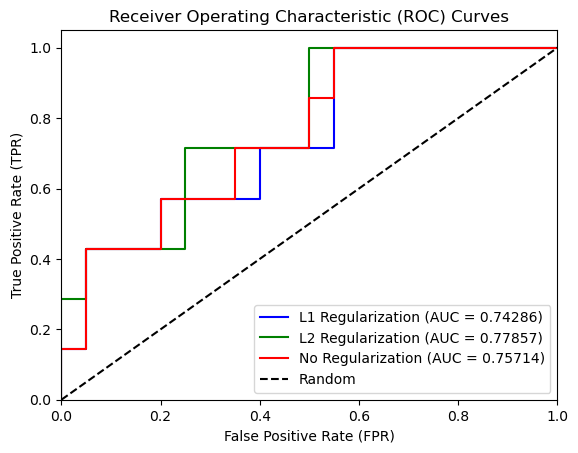

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming X_test_prepared and y_test are your test set
# Assuming l1_model and l2_model are your logistic regression models with L1 and L2 regularization respectively
# Assuming no_reg_model is your logistic regression model without regularization

# Generate predicted probabilities for positive class for each model
y_scores_l1 = l1_logistic_regression.predict_proba(X_test_prepared)[:, 1]
y_scores_l2 = l2_logistic_regression.predict_proba(X_test_prepared)[:, 1]
y_scores_no_reg = logistic_regression.predict_proba(X_test_prepared)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values for each model
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, y_scores_l1)
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_scores_l2)
fpr_no_reg, tpr_no_reg, thresholds_no_reg = roc_curve(y_test, y_scores_no_reg)

# Compute the area under the ROC curve (AUC) for each model
roc_auc_l1 = auc(fpr_l1, tpr_l1)
roc_auc_l2 = auc(fpr_l2, tpr_l2)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg)

# Plot the ROC curves for each model
plt.figure()
plt.plot(fpr_l1, tpr_l1, color='blue', label='L1 Regularization (AUC = %0.5f)' % roc_auc_l1)
plt.plot(fpr_l2, tpr_l2, color='green', label='L2 Regularization (AUC = %0.5f)' % roc_auc_l2)
plt.plot(fpr_no_reg, tpr_no_reg, color='red', label='No Regularization (AUC = %0.5f)' % roc_auc_no_reg)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


Based on these values, the L2 Regularization model has the highest AUC, indicating better performance in distinguishing between the classes compared to the other models.

<h3>
Cross-Validation for Model Evaluation in a Small Dataset</h3>
Given the small size of our dataset, cross-validation can be employed as an alternative approach to evaluate the accuracy of the models. This method is particularly valuable when dealing with limited data, as it helps identify the best-performing model by assessing its performance across different subsets of the data. By using cross-validation, we can obtain more reliable estimates of the model's accuracy and ensure a robust evaluation even with a small dataset.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform cross-validation for both models
l1_scores = cross_val_score(l1_logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')
l2_scores = cross_val_score(l2_logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')
no_scores = cross_val_score(logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')

# Print the mean and standard deviation of the scores for both models
print("L1 Regularization: Accuracy: %0.8f (+/- %0.5f)" % (l1_scores.mean(), l1_scores.std() * 2))
print("L2 Regularization: Accuracy: %0.8f (+/- %0.5f)" % (l2_scores.mean(), l2_scores.std() * 2))
print("no Regularization: Accuracy: %0.8f (+/- %0.5f)" % (no_scores.mean(), no_scores.std() * 2))


L1 Regularization: Accuracy: 0.69363636 (+/- 0.24664)
L2 Regularization: Accuracy: 0.69454545 (+/- 0.17021)
no Regularization: Accuracy: 0.68363636 (+/- 0.23648)


Considering these findings, the L2 regularization technique appears to be the most favorable option, as it provides comparable accuracy to L1 regularization while exhibiting more consistent performance across folds

<h3>Best performing model</h3>
After a comprehensive evaluation of various performance metrics, considering the limited size of the dataset and the application of cross-validation to mitigate its impact, we can deduce that the L2 regularization model outperforms other models in classifying our data. The L2 regularization model demonstrates superior performance in terms of accuracy, precision, recall, F1 score, and AUC compared to the models with L1 regularization and no regularization. Hence, it can be concluded that the L2 regularization model is the optimal choice for effectively classifying the given dataset.



<h3>
Grid Search for Best Hyperparameters in Random Forest Classifier</h3>
The code below utilizes grid search with cross-validation to find the best hyperparameters for a Random Forest Classifier. It defines a grid of hyperparameters, performs the search, and outputs the best hyperparameters. This approach helps identify the optimal hyperparameter configuration for the classifier.

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_prepared, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


<h3>Evaluation of Random Forest Classifier with Best Hyperparameters</h3>
The following code trains a Random Forest classifier with the best hyperparameters selected through cross-validation. It predicts the target values for the test set and evaluates the classifier's performance using accuracy, precision, recall, and F1 score. The results are printed on the screen.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train Random Forest classifier
rf_class = RandomForestClassifier(max_depth= None,min_samples_leaf=4, min_samples_split= 2, n_estimators= 100,random_state=42)
rf_class.fit(X_train_prepared, y_train)
X_test_prep=preprocessing_pipeline.fit_transform(X_test)
# Make predictions on test set
y_pred = rf_class.predict(X_test_prep)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")


Random Forest Classifier:
Accuracy: 0.7407
Precision: 0.5000
Recall: 0.2857
F1 score: 0.3636



Based on the evaluation results, the Random Forest Classifier achieved an accuracy of 0.7407, precision of 0.5000, recall of 0.2857, and F1 score of 0.3636. On the other hand, the L2 Regularization model achieved an accuracy of 0.81481, precision of 0.75000, recall of 0.42857, and F1 score of 0.54545. Comparing the two models, the L2 Regularization model performs better across all metrics, indicating it is the superior choice for classification.

<h3>ROC Curve Comparison: L2 Logistic Regression vs Random Forest Classifier</h3>
For further comparison of the L2 logistic regression classifier and Random forest classifier, a ROC curve was plotted as follows:

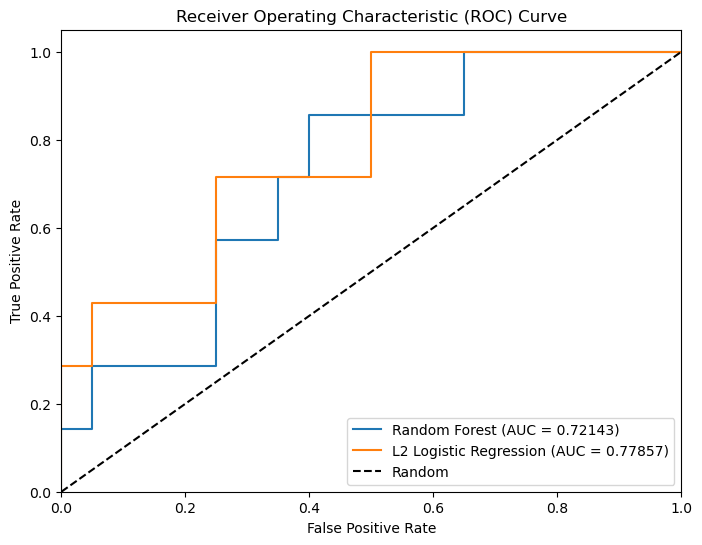

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest Classifier
rf_probabilities = rf_class.predict_proba(X_test_prepared)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# L2 Logistic Regression
l2_probabilities = l2_logistic_regression.predict_proba(X_test_prepared)[:, 1]
l2_fpr, l2_tpr, _ = roc_curve(y_test, l2_probabilities)
l2_auc = roc_auc_score(y_test, l2_probabilities)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.5f})')
plt.plot(l2_fpr, l2_tpr, label=f'L2 Logistic Regression (AUC = {l2_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--',label="Random")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In this case, the L2 regularization model has a higher AUC value, indicating better predictive performance and a higher ability to discriminate between the positive and negative classes compared to the Random Forest model.

Therefore, based on the AUC values, the L2 regularization model appears to be performing better in terms of classification performance than the Random Forest model.

<h3>Cross-Validation Accuracy Comparison: L2 Logistic Regression vs Random Forest Classifier</h3>

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform cross-validation for both models
l2_scores = cross_val_score(l2_logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')
rf_scores = cross_val_score(rf_class, X_train_prepared, y_train, cv=10, scoring='accuracy')

# Print the mean and standard deviation of the scores for both models
print("Random Forest Classification: Accuracy: %0.8f (+/- %0.5f)" % (rf_scores.mean(), rf_scores.std() * 2))
print("L2 Regularization: Accuracy: %0.8f (+/- %0.5f)" % (l2_scores.mean(), l2_scores.std() * 2))

Random Forest Classification: Accuracy: 0.64454545 (+/- 0.23796)
L2 Regularization: Accuracy: 0.69454545 (+/- 0.17021)


The Random Forest Classification model has an accuracy of 0.64454545 with a standard deviation of +/- 0.23796, while the L2 Regularization model has an accuracy of 0.69454545 with a standard deviation of +/- 0.17021.

Based on these results, the L2 Regularization model shows a slightly higher accuracy and lower variation compared to the Random Forest Classification model. Therefore, in this case, the L2 Regularization model may be considered better in terms of accuracy and stability.

<h3>
Top Five Features based on Importance: Random Forest Classifier</h3>

In [32]:
# Get feature importances
importances = rf_class.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
top_features = feature_importances.sort_values('Importance', ascending=False).head(5)

# Print the top five features
print(top_features)

                Feature  Importance
3                  epss    0.251046
4                  lvdd    0.214613
0      AgeAtHeartAttack    0.181711
5       WallMotionIndex    0.175975
2  FractionalShortening    0.139644


These features are ranked based on their importance values, with the highest importance assigned to the "epss" feature and the lowest to the "FrationalShortening" feature.